# Selekcja cech i redukcja wymiarowości

**Uwaga:** upewnij się, że masz scikit-learn w wersji 1.2 lub nowszej. Dzięki temu będzie można ustawić opcję `transform_output="pandas"`, dzięki której wszystkie transformatory w scikit-learn będą nie tylko przyjmować, ale też zwracać DataFrame, zachowując nazwy zmiennych. Będzie to bardzo przydatne w analizie danych.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [239]:
print("The scikit-learn version is {}.".format(sklearn.__version__))

The scikit-learn version is 1.4.1.post1.


In [238]:
import sklearn


sklearn.set_config(transform_output="pandas")

## Analiza cech

Ponownie wykorzystamy zbiór danych [Ames housing](https://www.openintro.org/book/statdata/?data=ames), w którym zadaniem jest przewidywanie wartości domu na podstawie cech budynku, działki, lokalizacji itp. Ma on duży zbiór wejściowych cech, odpowiadający typowym wartościom ze stron handlujących nieruchomościami, więc odpowiada realnym potrzebom analizy biznesowej.

Interpretowalność jest tutaj kluczowa, bo każdy sprzedający chce zyskać jak najwięcej. Informacja, które cechy nie mają znaczenia dla kupujących, a na które jest zwracana największa uwaga, mogą np. pokierować decyzjami, które części domu wyremontować przed ogłoszeniem sprzedaży. Z kolei cechy o niskiej ważności warto odrzucić nie tylko, aby pomóc modelowi ML, ale też żeby np. nie wspominać o tych elementach w ogłoszeniu, bo i tak mało kogo obchodzą.

Zmniejszenie liczby cech jest też korzystne dla samych firm IT oferujących serwisy sprzedażowe, bo może być ważne dla user experience (UX). Formularz na 70 elementów o różnych cechach domu jest mocno problematyczny do wypełnienia, a taki na 20 jest już znacznie przyjaźniejszy. Takie rzeczy jak najbardziej mogą decydować o tym, którą platformę do ogłoszeń wybiorą sprzedający.

Poniższy kod wczytuje dane i dokonuje podziału na zbiór treningowy i testowy.

**Uwaga:** będziemy operować na wielu kopiach danych do różnych wariantów procesowania danych. Nadpisanie zmiennej `X_train` z komórki poniżej może skutkować trudnymi do znalezienia bugami, zwróć na to uwagę.

In [189]:
from sklearn.model_selection import train_test_split


df = pd.read_csv("ames_data.csv")

# remove dots from names to match data_description.txt
df.columns = [col.replace(".", "") for col in df.columns]

df = df.drop(["Order", "PID"], axis="columns")
df = df.loc[~df["Neighborhood"].isin(["GrnHill", "Landmrk"]), :]

df = df.loc[df["GrLivArea"] <= 4000, :]

df.loc[:, "SalePrice"] = np.log1p(df.loc[:, "SalePrice"])


def replace_na(df: pd.DataFrame, col: str, value) -> None:
    df.loc[:, col] = df.loc[:, col].fillna(value)


# Alley : data description says NA means "no alley access"
replace_na(df, "Alley", value="None")

# BedroomAbvGr : NA most likely means 0
replace_na(df, "BedroomAbvGr", value=0)

# BsmtQual etc : data description says NA for basement features is "no basement"
replace_na(df, "BsmtQual", value="No")
replace_na(df, "BsmtCond", value="No")
replace_na(df, "BsmtExposure", value="No")
replace_na(df, "BsmtFinType1", value="No")
replace_na(df, "BsmtFinType2", value="No")
replace_na(df, "BsmtFullBath", value=0)
replace_na(df, "BsmtHalfBath", value=0)
replace_na(df, "BsmtUnfSF", value=0)

# Condition : NA most likely means Normal
replace_na(df, "Condition1", value="Norm")
replace_na(df, "Condition2", value="Norm")

# Electrical : NA most likely means standard
replace_na(df, "Electrical", value="SBrkr")

# External stuff : NA most likely means average
replace_na(df, "ExterCond", value="TA")
replace_na(df, "ExterQual", value="TA")

# Fence : data description says NA means "no fence"
replace_na(df, "Fence", value="No")

# Functional : data description says NA means typical
replace_na(df, "Functional", value="Typ")

# GarageType etc : data description says NA for garage features is "no garage"
replace_na(df, "GarageType", value="No")
replace_na(df, "GarageFinish", value="No")
replace_na(df, "GarageQual", value="No")
replace_na(df, "GarageCond", value="No")
replace_na(df, "GarageArea", value=0)
replace_na(df, "GarageCars", value=0)

# HalfBath : NA most likely means no half baths above grade
replace_na(df, "HalfBath", value=0)

# HeatingQC : NA most likely means typical
replace_na(df, "HeatingQC", value="Ta")

# KitchenAbvGr : NA most likely means 0
replace_na(df, "KitchenAbvGr", value=0)

# KitchenQual : NA most likely means typical
replace_na(df, "KitchenQual", value="TA")

# LotFrontage : NA most likely means no lot frontage
replace_na(df, "LotFrontage", value=0)

# LotShape : NA most likely means regular
replace_na(df, "LotShape", value="Reg")

# MasVnrType : NA most likely means no veneer
replace_na(df, "MasVnrType", value="None")
replace_na(df, "MasVnrArea", value=0)

# MiscFeature : data description says NA means "no misc feature"
replace_na(df, "MiscFeature", value="No")
replace_na(df, "MiscVal", value=0)

# OpenPorchSF : NA most likely means no open porch
replace_na(df, "OpenPorchSF", value=0)

# PavedDrive : NA most likely means not paved
replace_na(df, "PavedDrive", value="N")

# PoolQC : data description says NA means "no pool"
replace_na(df, "PoolQC", value="No")
replace_na(df, "PoolArea", value=0)

# SaleCondition : NA most likely means normal sale
replace_na(df, "SaleCondition", value="Normal")

# ScreenPorch : NA most likely means no screen porch
replace_na(df, "ScreenPorch", value=0)

# TotRmsAbvGrd : NA most likely means 0
replace_na(df, "TotRmsAbvGrd", value=0)

# Utilities : NA most likely means all public utilities
replace_na(df, "Utilities", value="AllPub")

# WoodDeckSF : NA most likely means no wood deck
replace_na(df, "WoodDeckSF", value=0)

# CentralAir : NA most likely means No
replace_na(df, "CentralAir", value="N")

# EnclosedPorch : NA most likely means no enclosed porch
replace_na(df, "EnclosedPorch", value=0)

# FireplaceQu : data description says NA means "no fireplace"
replace_na(df, "FireplaceQu", value="No")
replace_na(df, "Fireplaces", value=0)

# SaleCondition : NA most likely means normal sale
replace_na(df, "SaleCondition", value="Normal")

df = df.replace(
    {
        "MSSubClass": {
            20: "SC20",
            30: "SC30",
            40: "SC40",
            45: "SC45",
            50: "SC50",
            60: "SC60",
            70: "SC70",
            75: "SC75",
            80: "SC80",
            85: "SC85",
            90: "SC90",
            120: "SC120",
            150: "SC150",
            160: "SC160",
            180: "SC180",
            190: "SC190",
        },
        "MoSold": {
            1: "Jan",
            2: "Feb",
            3: "Mar",
            4: "Apr",
            5: "May",
            6: "Jun",
            7: "Jul",
            8: "Aug",
            9: "Sep",
            10: "Oct",
            11: "Nov",
            12: "Dec",
        },
    }
)

df = df.replace(
    {
        "Alley": {"None": 0, "Grvl": 1, "Pave": 2},
        "BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "BsmtExposure": {"No": 0, "Mn": 1, "Av": 2, "Gd": 3},
        "BsmtFinType1": {
            "No": 0,
            "Unf": 1,
            "LwQ": 2,
            "Rec": 3,
            "BLQ": 4,
            "ALQ": 5,
            "GLQ": 6,
        },
        "BsmtFinType2": {
            "No": 0,
            "Unf": 1,
            "LwQ": 2,
            "Rec": 3,
            "BLQ": 4,
            "ALQ": 5,
            "GLQ": 6,
        },
        "BsmtQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "FireplaceQu": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "Functional": {
            "Sal": 1,
            "Sev": 2,
            "Maj2": 3,
            "Maj1": 4,
            "Mod": 5,
            "Min2": 6,
            "Min1": 7,
            "Typ": 8,
        },
        "GarageCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "GarageQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "LandSlope": {"Sev": 1, "Mod": 2, "Gtl": 3},
        "LotShape": {"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4},
        "PavedDrive": {"N": 0, "P": 1, "Y": 2},
        "PoolQC": {"No": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
        "Street": {"Grvl": 1, "Pave": 2},
        "Utilities": {"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4},
    }
)

y = df.pop("SalePrice")

X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=0
)

X_train

C:\Users\basia\AppData\Local\Temp\ipykernel_13460\2854757000.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.27839796 11.56172515 12.05525557 ... 11.79056478 12.0435596
 12.14420256]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, "SalePrice"] = np.log1p(df.loc[:, "SalePrice"])
C:\Users\basia\AppData\Local\Temp\ipykernel_13460\2854757000.py:161: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2500,SC60,RL,105.0,11025,2,0,4,HLS,4,Inside,...,0,0,0,No,No,0,Oct,2006,WD,Normal
261,SC20,RL,75.0,10650,2,0,4,Lvl,4,Corner,...,0,0,0,MnPrv,No,0,Feb,2010,WD,Normal
1774,SC60,RL,82.0,9044,2,0,3,Lvl,4,Inside,...,0,0,0,No,No,0,May,2007,WD,Normal
2588,SC20,RL,80.0,13600,2,0,4,Bnk,4,Inside,...,0,0,0,MnPrv,Shed,650,Nov,2006,WD,Normal
1023,SC20,RL,90.0,13068,2,0,4,Lvl,4,Corner,...,0,0,0,MnPrv,No,0,Nov,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,SC90,RL,60.0,10800,2,0,4,Lvl,4,Inside,...,0,0,0,No,No,0,Mar,2009,WD,Alloca
835,SC20,RL,82.0,12464,2,0,2,Low,4,Corner,...,0,0,0,GdPrv,No,0,Nov,2009,WD,Normal
1654,SC20,RL,80.0,10400,2,0,4,Lvl,4,Inside,...,0,0,0,No,No,0,Aug,2007,WD,Normal
2613,SC20,RL,60.0,7332,2,0,4,Lvl,4,Inside,...,0,0,0,No,No,0,Oct,2006,WD,Abnorml


Analiza cech kategorycznych i numerycznych wykorzystuje często różne metody i wymaga innego preprocessingu. Dodatkowo one-hot encoding bardzo utrudnia interpretację cech kategorycznych, dlatego trzeba się zastanowić, na którym etapie przetwarzania danych dokonujemy sprawdzania ważności cech danym algorytmem.

Na początek skupimy się na zmiennych numerycznych. Podstawową metodą jest sprawdzenie wariancji tych danych. Wymaga to danych bez wartości brakujących i o tej samej skali.

**Uwaga:** nie można tutaj dokonać standaryzacji! Wtedy dzieli się przez odchylenie standardowe, więc wszystko ma wariancję 1. Trzeba dokonać przeskalowania przez min-max scaling.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


X_train_num = X_train.select_dtypes(exclude="object")

numerical_pipeline = make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler())

X_train_num = numerical_pipeline.fit_transform(X_train_num)
X_train_num

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold
2500,0.335463,0.044697,1.0,0.0,1.000000,1.0,0.5,0.777778,0.500,0.868217,...,1.0,0.124298,0.280323,0.183794,0.00000,0.0,0.0,0.0,0.000,0.00
261,0.239617,0.042942,1.0,0.0,1.000000,1.0,1.0,0.444444,0.625,0.744186,...,1.0,0.256320,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000,1.00
1774,0.261981,0.035430,1.0,0.0,0.666667,1.0,1.0,0.777778,0.500,0.899225,...,1.0,0.139045,0.123989,0.000000,0.00000,0.0,0.0,0.0,0.000,0.25
2588,0.255591,0.056742,1.0,0.0,1.000000,1.0,1.0,0.444444,0.625,0.581395,...,1.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.052,0.00
1023,0.287540,0.054253,1.0,0.0,1.000000,1.0,1.0,0.555556,0.500,0.744186,...,1.0,0.000000,0.000000,0.000000,0.34252,0.0,0.0,0.0,0.000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.191693,0.043644,1.0,0.0,1.000000,1.0,1.0,0.444444,0.500,0.829457,...,1.0,0.084270,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000,0.75
835,0.261981,0.051428,1.0,0.0,0.333333,1.0,0.5,0.444444,0.500,0.899225,...,1.0,0.117978,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000,0.75
1654,0.255591,0.041773,1.0,0.0,1.000000,1.0,1.0,0.555556,0.500,0.767442,...,1.0,0.168539,0.190027,0.000000,0.00000,0.0,0.0,0.0,0.000,0.25
2613,0.191693,0.027421,1.0,0.0,1.000000,1.0,1.0,0.555556,0.625,0.612403,...,1.0,0.117978,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000,0.00


In [19]:
X_train.shape

(2045, 79)

In [20]:
X_train_num.shape

(2045, 54)

Do usuwania cech o niskiej wariancji służy klasa `VarianceThreshold`. Jaki jednak ustawić próg wariancji? To dobrze byłoby najpierw sprawdzić na wykresie, bo w zależności od zbioru dane po prostu ogólnie mogą mieć mniejszą lub większą zmienność.

**Zadanie 1 (0.5 punktu)**

1. Oblicz wariancję dla cech w danych treningowych.
2. Posortuj cechy w kolejności od największej do najmniejszej wariancji.
3. Wypisz cechy o najmniejszej wariancji (razem z jej wartościami).
4. Przedstaw to na wykresie słupkowym (bar plot). Pamiętaj o tytule wykresu, opisaniu osi i cech. Upewnij się, że ma odpowiednią wielkość, aby nazwy cech były czytelne.
5. Zinterpretuj wykres i skomentuj:
   - jaki twoim zdaniem byłby sensowny próg wariancji?
   - czy jest cecha / cechy, które twoim zdaniem są tak mało zmienne, że są bezużyteczne?
   - czy twoim zdaniem cechy o największej wariancji wydają się bardzo użyteczne?

Podpowiedź: każdy z podpunktów da się zrobić jedną metodą na DataFrame'ie.

In [13]:
X_train_num.var()

LotFrontage      0.011413
LotArea          0.001347
Street           0.003899
Alley            0.033356
LotShape         0.035301
Utilities        0.000611
LandSlope        0.015857
OverallQual      0.024150
OverallCond      0.019219
YearBuilt        0.054076
YearRemodAdd     0.119803
MasVnrArea       0.011946
ExterQual        0.037931
ExterCond        0.008609
BsmtQual         0.032458
BsmtCond         0.012949
BsmtExposure     0.122721
BsmtFinType1     0.124022
BsmtFinSF1       0.036838
BsmtFinType2     0.027021
BsmtFinSF2       0.013841
BsmtUnfSF        0.034879
TotalBsmtSF      0.017447
HeatingQC        0.058042
X1stFlrSF        0.012005
X2ndFlrSF        0.050930
LowQualFinSF     0.002047
GrLivArea        0.019565
BsmtFullBath     0.030206
BsmtHalfBath     0.014843
FullBath         0.018889
HalfBath         0.062622
BedroomAbvGr     0.010134
KitchenAbvGr     0.010879
KitchenQual      0.027788
TotRmsAbvGrd     0.019491
Functional       0.009279
Fireplaces       0.026254
FireplaceQu 

In [18]:
X_train_num.var().sort_values(ascending=False)

FireplaceQu      0.130610
BsmtFinType1     0.124022
BsmtExposure     0.122721
YearRemodAdd     0.119803
YrSold           0.108258
PavedDrive       0.067429
HalfBath         0.062622
HeatingQC        0.058042
YearBuilt        0.054076
X2ndFlrSF        0.050930
GarageYrBlt      0.045556
ExterQual        0.037931
BsmtFinSF1       0.036838
LotShape         0.035301
BsmtUnfSF        0.034879
GarageCars       0.034701
Alley            0.033356
BsmtQual         0.032458
BsmtFullBath     0.030206
KitchenQual      0.027788
BsmtFinType2     0.027021
Fireplaces       0.026254
OverallQual      0.024150
GarageArea       0.020222
GrLivArea        0.019565
TotRmsAbvGrd     0.019491
GarageQual       0.019372
OverallCond      0.019219
GarageCond       0.019028
FullBath         0.018889
TotalBsmtSF      0.017447
LandSlope        0.015857
BsmtHalfBath     0.014843
BsmtFinSF2       0.013841
BsmtCond         0.012949
X1stFlrSF        0.012005
MasVnrArea       0.011946
LotFrontage      0.011413
KitchenAbvGr

<Axes: title={'center': 'Numerical features variance sorted'}, xlabel='Numerical features', ylabel='Feature variance'>

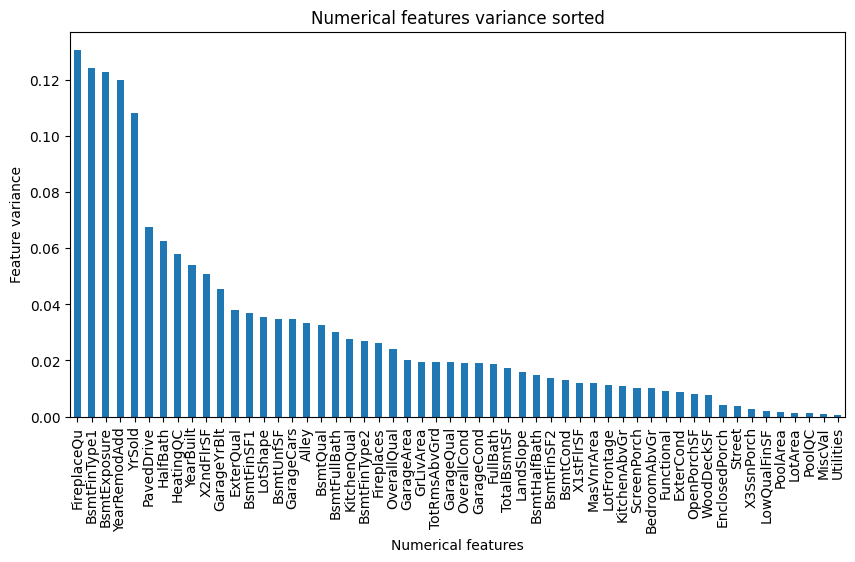

In [56]:
f, ax = plt.subplots(1, figsize=(10, 5))
X_train_num.var().sort_values(ascending=False).plot.bar(
    ax=ax,
    title="Numerical features variance sorted",
    xlabel="Numerical features",
    ylabel="Feature variance",
)

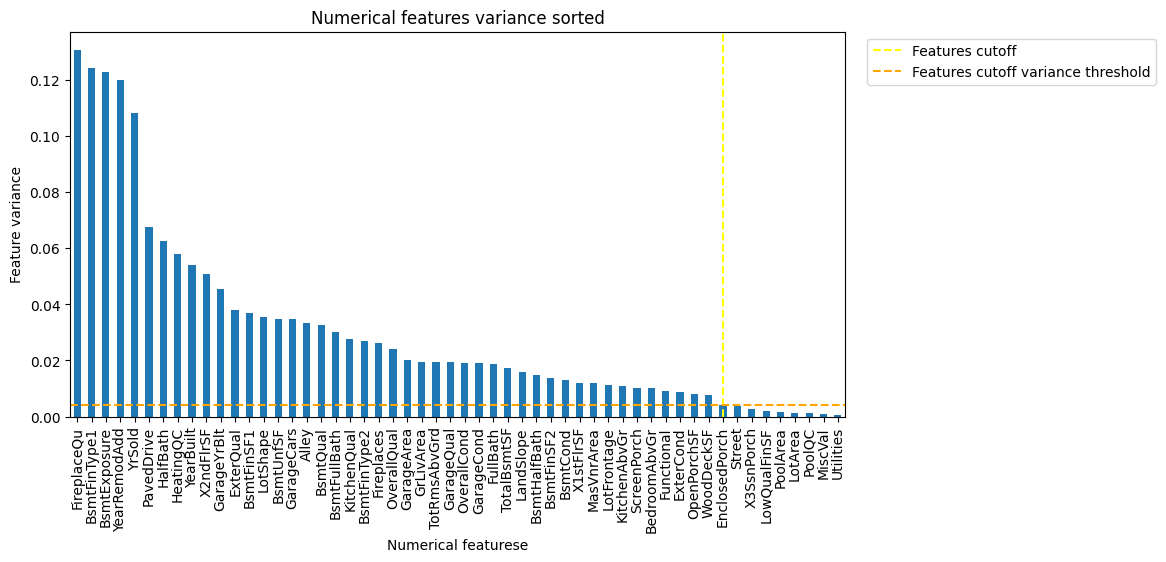

In [64]:
f, ax = plt.subplots(1, figsize=(10, 5))
X_train_num.var().sort_values(ascending=False).plot.bar(
    ax=ax,
    title="Numerical features variance sorted",
    xlabel="Numerical featurese",
    ylabel="Feature variance",
)
ax.axvline(
    x=45,
    linestyle="dashed",
    color="yellow",
    # linewidth=0.5,
    label="Features cutoff",
)
ax.axhline(
    y=X_train_num.var()["EnclosedPorch"],
    linestyle="dashed",
    color="orange",
    # linewidth=0.5,
    label="Features cutoff variance threshold",
)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

// skomentuj tutaj

- Pytanie o sensowny próg wariancji jest tricky. Intuicyjnie poprowadziłabym go tak, jak zaznaczyłam przerywanymi liniami na powyższym wykresie.
  Powyższych cech numerycznych jest 54. Usuwając jedynie te ostatnie 9, sporo nam zostaje do modelu, ale to dobrze. Chociaż z drugiej strony usunięcie tylko tych 9 ostatnich powoduje, że zostaje nam ich aż 45, co np. jest troszkę za dużo jak na formularz, o którym było we wstępnie do zadania.
- Inny dostrzegalny okiem próg wariancji, bardziej śmiały, to np. ten przy cesze GarageArea. Ale tam redukowalibyśmy już liczbę cech o połowę.
- Tak, te ostatnie kilka cech wydaje się być na tyle mało zmiennych, że bezużyteczne.
- Wśród cech o największej wariancji znajdziemy pewnie i te wnoszące intuicyjnie dużo informacji o wpływie na cenę domu, jak np. YrSold czy HeatingQC, jak i te, które są zmienne ze względu na swoją naturę, ale
  pewnie nie dają aż tyle cennego wkładu do oceny cen domów. Żeby to lepiej określić, należałoby się przyjrzeć dokładnemu opisowi cech.

Wariancja sprawdza tylko zmienność cech, a w szczególności nie uwzględnia żadnych interakcji między cechami. Sprawdźmy zatem liniowe korelacje pomiędzy cechami.

Jako że naszych cech jest bardzo dużo, to najpier warto narysować heatmapę korelacji, bez żadnych liczb, i wizualnie oszacować, czy mamy mocno skorelowane cechy.

<Axes: >

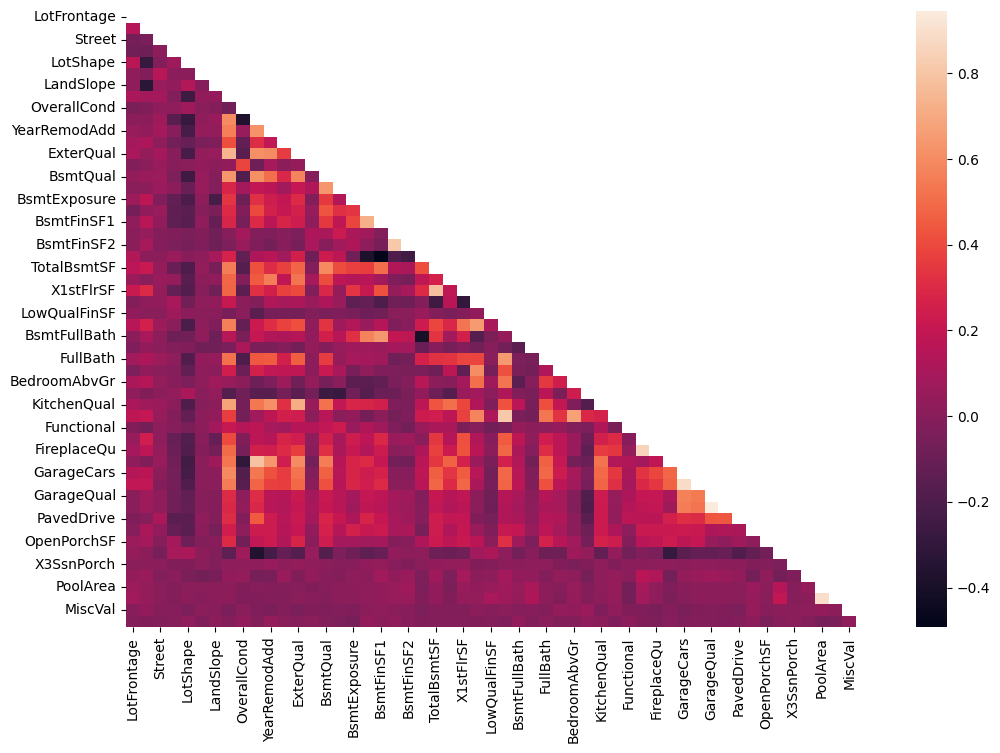

In [65]:
import seaborn as sns


corr_matrix = X_train_num.corr()
# remove upper triangle, to plot only lower triangle of correlations
corr_matrix = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape)).astype(bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)

Na oko nie ma tutaj wielu bardzo mocnych korelacji, rzędu 0.8 albo więcej. Mamy jednak dużo cech, więc warto popatrzeć też na same pary korelacji między kolumnami.

Tutaj liczy się ogólna siła korelacji, więc posortujemy malejąco po wartości bezwzględnej korelacji.

In [85]:
(corr_matrix.stack().sort_values(ascending=False, key=lambda x: abs(x)).head(10))

GarageCond    GarageQual      0.945034
PoolQC        PoolArea        0.899771
GarageArea    GarageCars      0.885777
FireplaceQu   Fireplaces      0.856795
TotRmsAbvGrd  GrLivArea       0.813288
BsmtFinSF2    BsmtFinType2    0.812546
GarageYrBlt   YearBuilt       0.791373
X1stFlrSF     TotalBsmtSF     0.780180
ExterQual     OverallQual     0.740265
BsmtFinSF1    BsmtFinType1    0.722830
dtype: float64

Jak widać, mamy jedną mocno skorelowaną parę - jakość i stan garażu. Ma to sens, w końcu to praktycznie zduplikowana informacja. Mamy też kilka par cech z dość mocnymi korelacjami powyżej 0.8. Ale biorąc pod uwagę, jak dużo cech mamy, to jest generalnie nieźle.

Ostatnią prostą miarą, którą zweryfikujemy, jest korelacja (konkretnie Pearson r correlation) między cechą a zmienną zależną. Scikit-learn implementuje ją jako funkcję, która przyjmuje macierz X, wektor y i zwraca wektor z wartością korelacji dla każdej cechy.

<Axes: >

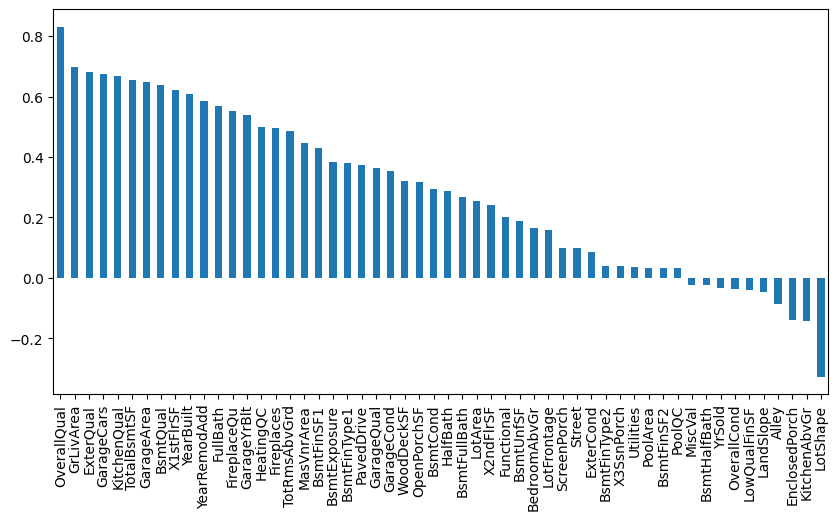

In [305]:
from sklearn.feature_selection import r_regression


importances_corr_r = r_regression(X_train_num, y_train)

# change to pd.Series for easier sorting and plotting
importances_corr_r = pd.Series(importances_corr_r, index=X_train_num.columns)
importances_corr_r = importances_corr_r.sort_values(ascending=False)

# create bar plot
importances_corr_r.plot.bar(figsize=(10, 5))

**Zadanie 2 (1 punkt)**

1. Czy uzyskane korelacje dla cech są zgodne z oczekiwaniami i ogólnie mają sens?
2. Mamy sporo cech o dość mocnej korelacji (0.5 lub więcej) - czy dobrze, czy źle, i dlaczego?
3. Mamy cechę (LotShape) o wyraźniej negatywnej korelacji. Czy takie cechy są użyteczne?

// skomentuj tutaj

1. Generalnie tak, headowe 10 wartości bezwzględnych z macierzy korelacji to bardzo sensowne pary, dotyczą tych samych własności domu, np. pool quality i pool area, lub powiązanych ze sobą właśności domu, np. rok wybudowania domu i rok wybudowania garażu. Macierz korealcji wyszła nam sensowna.
2. Korelacja w pewnym rozumieniu pokazuje nam moc liniowej zależności między cechami. Z jednej strony zatem to dobrze, że widzimy potencjał liniowych zależności między cechami, w szczególności jeśli planujemy używać modeli liniowych. Z drugiej strony to "źle", bo to znaczy, że nasze cechy sa redundantne (nieoptymalne zbieranie danych). Ale to też dobrze, bo dzięki temu możemy zrobić redukcję cech, model będzie lżejszy, interpretowalność większa i ogólnie będzie ok.
3. Negatywna korelacja mówi nam o tym, że dwie zmienne zmieniają się w przeciwnych kierunkach, tj. gdy jedna rośnie, to druga maleje. Generalnie interesują nas bardziej wartości (bezwzględne) korelacji niż sam jej znak, on mówi o kierunku potencjalnej zależności. Co do samego LotShape, to liczyliśmy korelację ze zmienną objaśnianą, taka korelacja nas szczególnie interesuje. Choć nie mówi o przyczynowości, to mówi, że istnieje jakaś wzajemność (i to w dodatku liniowa), więc cecha może być potencjalnie użyteczna (ale nie musi).

Przydałoby się w końcu przestać ignorować cechy kategoryczne i sprawdzić ważność faktycznie wszystkich cech. Można do tego użyć mutual information. Scikit-learn implementuje je jako funkcję, która przyjmuje X, y oraz informację o tym, które cechy są dyskretne. Mogą to być i cechy kategoryczne, i numeryczne, które mają wartości całkowite.

Mamy jednak problem - na wejściu mamy zmienne dyskretne, które zamieniliśmy na ciągłe przez min-max scaling. W przypadku mutual information nie należy tego robić, bo obsługuje wprost zmienne dyskretne.

**Zadanie 3 (3 punkty)**

1. Znajdź typy kolumn w danych:
   - kategoryczne: wszystkie typu "object"
   - numeryczne: wszystkie poza typem "object"
2. Stwórz pipeline do przetwarzania danych:
   - skorzystaj z klasy `ColumnTransformer`, przetwarzając w odpowiedni sposób zmienne (jak na laboratorium 1)
   - `OrdinalEncoder` do zmiennych kategorycznych, żeby zakodować je jako liczby całkowite
   - `SimpleImputer` do zmiennych numerycznych, aby imputować wartości brakujące medianą
   - użyj opcji `verbose_feature_names_out=False`, aby nazwy zmiennych nie były modyfikowane
3. Przetransformuj macierz `X_train`, tworząc `X_train_mi`.
4. Popraw z powrotem typy z pomocą metody `.convert_dtypes()` ([dokumentacja](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html)) - zapewni to, że zmienne całkowitoliczbowe będą miały odpowiedni typ.
5. Oblicz wartości mutual information dla zmiennych. Pamiętaj o podaniu, które zmienne są dyskretne, oraz o przekazaniu `random_state=0`.
6. Przedstaw ważności cech według MI na wykresie, posortowane malejąco.
7. Dokonaj interpretacji cech:
   - Czy nienadzorowane miary, których użyliśmy wcześniej (wariancja i korelacja) zgadzają się ważnością cech z MI?
   - Czy MI i korelacja ze zmienną zależną zgadzają się ze sobą? Jeżeli nie, to której mierze można by zaufać bardziej?
   - Czy mamy tutaj cechy, które wyraźnie warto usunąć wedle miary MI? Czy ma to sens, patrząc na znaczenie tych cech?

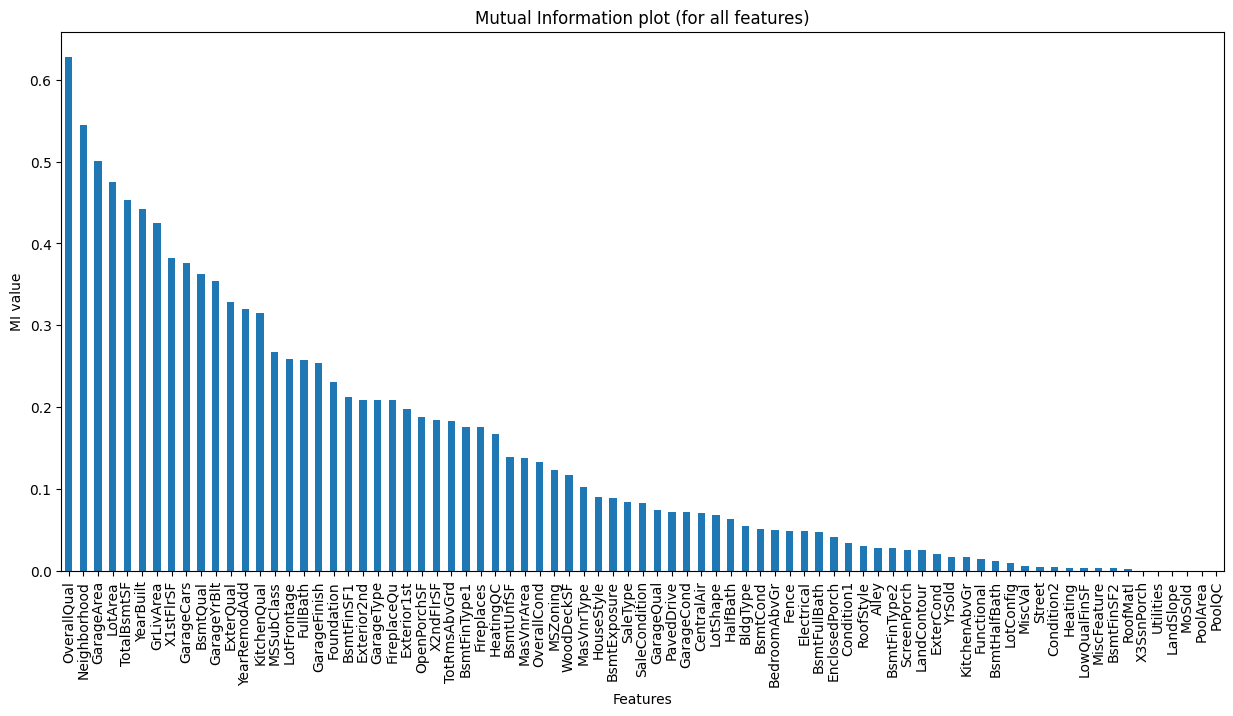

In [371]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder


categorical_features = X_train.select_dtypes(include="object").columns
numerical_features = X_train.select_dtypes(exclude="object").columns

column_transformer = ColumnTransformer(
    [
        ("ordinal_encoder", OrdinalEncoder(), categorical_features),
        ("simple_imputer", SimpleImputer(strategy="median"), numerical_features),
    ],
    verbose_feature_names_out=False,
)

X_mi = column_transformer.fit_transform(X_train)

# correct data types
X_mi = X_mi.convert_dtypes()

# get boolean mask with discrete columns
discrete_features = (X_mi.dtypes == "Int64").values

importances_mi = mutual_info_regression(
    X_mi, y_train, discrete_features=discrete_features, random_state=0
)

# plot
_, ax = plt.subplots(1, figsize=(15, 7))
pd.Series(importances_mi, index=X_mi.columns).sort_values(ascending=False).plot.bar(
    ax=ax,
    title="Mutual Information plot (for all features)",
    xlabel="Features",
    ylabel="MI value",
);

##### Ad. do maski discrete_features:

In [288]:
discrete_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Wyszło na to, że wszystkie zmienne są dyskretne w tym momencie. Ale tak też było w naszym oryginalnym df,
chociaż wartości technicznie były floatami, to były tak naprawdę całkowite:

In [296]:
df.select_dtypes(exclude="object").convert_dtypes().dtypes

LotFrontage      Int64
LotArea          Int64
Street           Int64
Alley            Int64
LotShape         Int64
Utilities        Int64
LandSlope        Int64
OverallQual      Int64
OverallCond      Int64
YearBuilt        Int64
YearRemodAdd     Int64
MasVnrArea       Int64
ExterQual        Int64
ExterCond        Int64
BsmtQual         Int64
BsmtCond         Int64
BsmtExposure     Int64
BsmtFinType1     Int64
BsmtFinSF1       Int64
BsmtFinType2     Int64
BsmtFinSF2       Int64
BsmtUnfSF        Int64
TotalBsmtSF      Int64
HeatingQC        Int64
X1stFlrSF        Int64
X2ndFlrSF        Int64
LowQualFinSF     Int64
GrLivArea        Int64
BsmtFullBath     Int64
BsmtHalfBath     Int64
FullBath         Int64
HalfBath         Int64
BedroomAbvGr     Int64
KitchenAbvGr     Int64
KitchenQual      Int64
TotRmsAbvGrd     Int64
Functional       Int64
Fireplaces       Int64
FireplaceQu      Int64
GarageYrBlt      Int64
GarageCars       Int64
GarageArea       Int64
GarageQual       Int64
GarageCond 

##### Porównanie z metodami z poprzedniego zadania (dla zmiennych numerycznych)

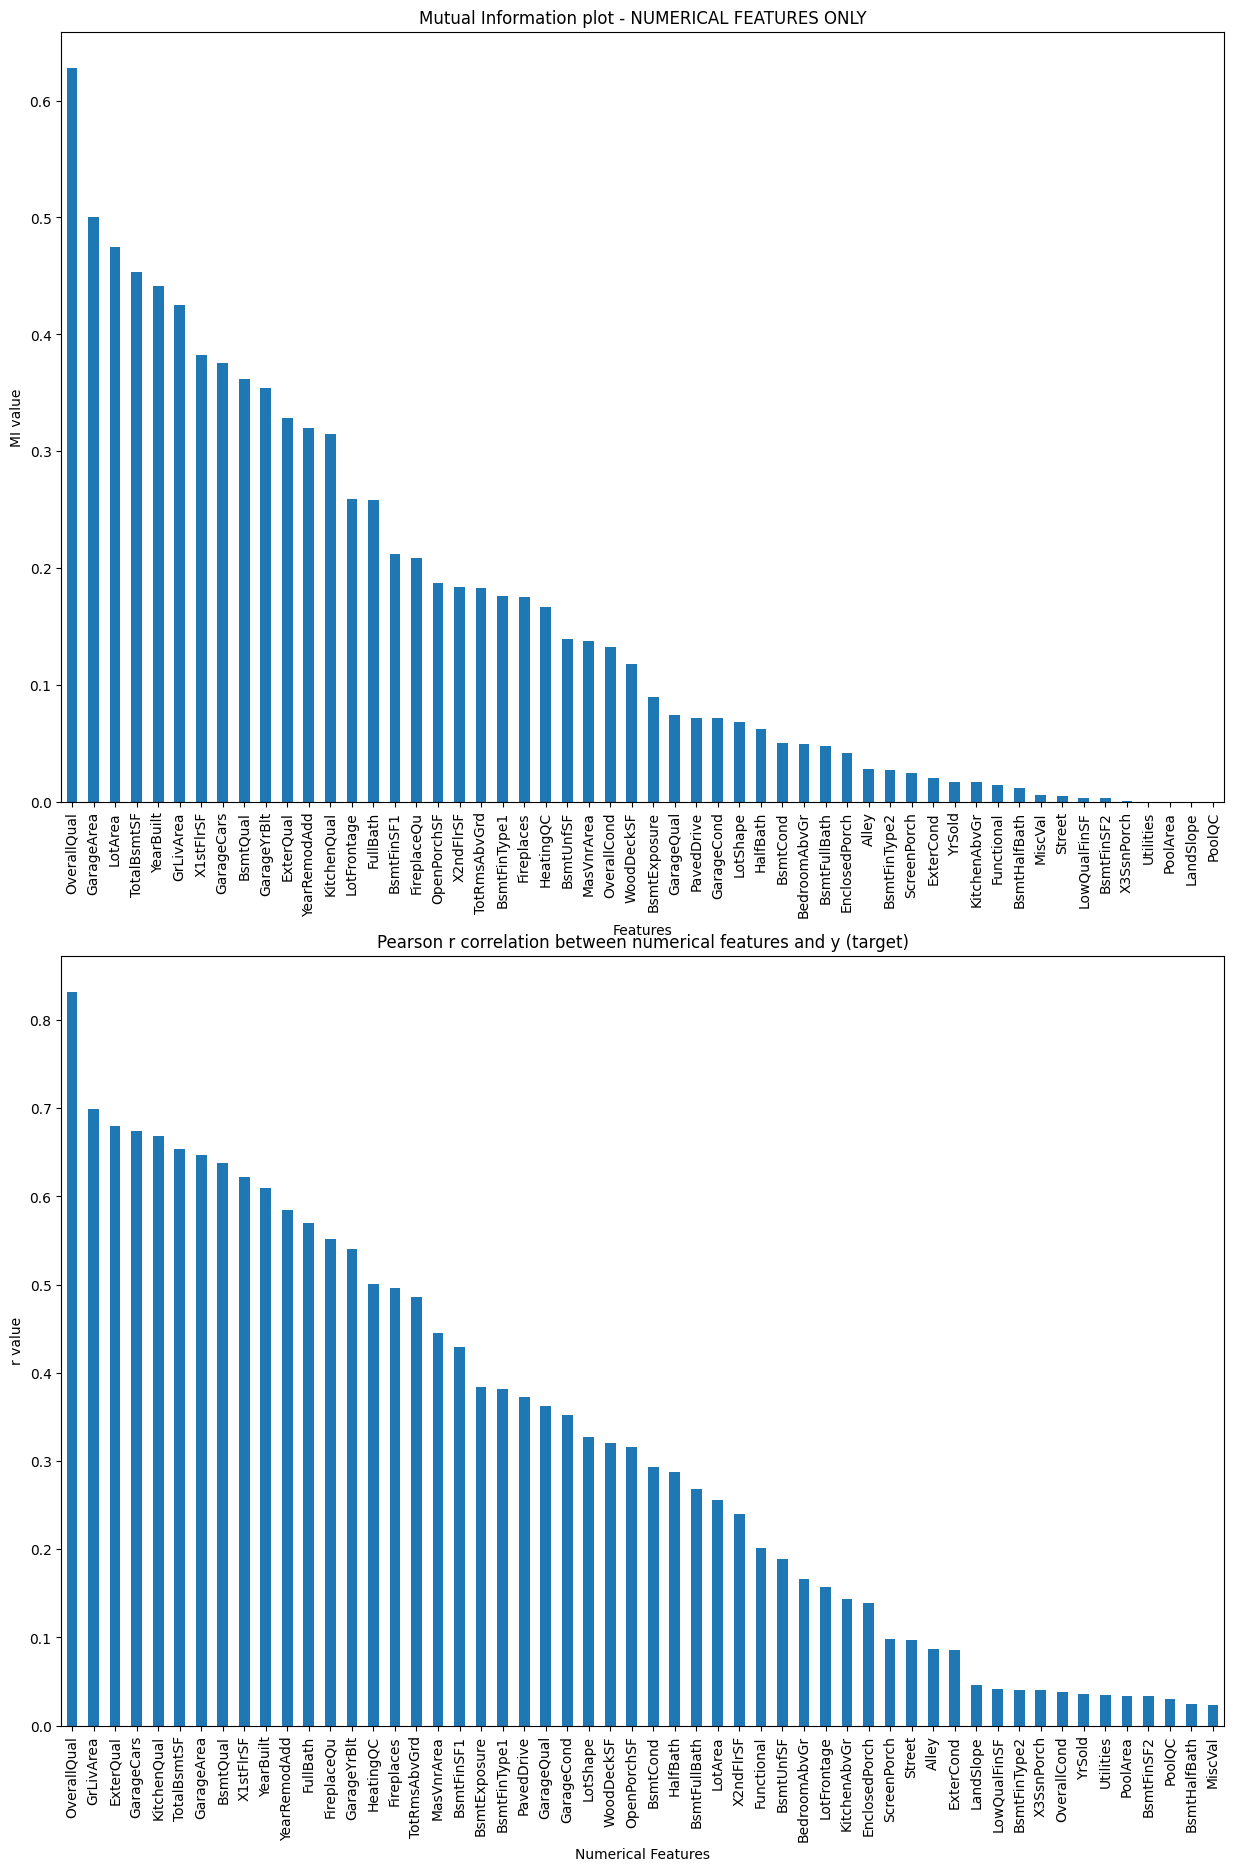

In [370]:
_, ax = plt.subplots(2, 1, figsize=(15, 22))

# Select by indexes used in importances_corr_r (numerical)
pd.Series(importances_mi, index=X_mi.columns).loc[importances_corr_r.index].sort_values(
    ascending=False
).plot.bar(
    ax=ax[0],
    title="Mutual Information plot - NUMERICAL FEATURES ONLY",
    xlabel="Features",
    ylabel="MI value",
)
importances_corr_r.apply(func=lambda x: abs(x)).sort_values(ascending=False).plot.bar(
    ax=ax[1],
    title="Pearson r correlation between numerical features and y (target)",
    xlabel="Numerical Features",
    ylabel="r value",
);

// skomentuj tutaj

Przy miarach wariancji, wzajemnej korelacji między cechami oraz korelacji między cechami a zm. zależną braliśmy pod uwagę jedynie cechy numeryczne. Przy MI również kategoryczne, dlatego rozkład najważniejszych cech się trochę zmienił - np. drugą najwyższą wartość MI miała cecha kat. "Neighborhood".

- Spośród wariancji i korelacji z MI bardziej zgadza się korelacja (ze zmiennną zależną).
- Korelacja ze zmienną zależną i MI zgadzają się w kwestii sporej liczby cech, np. wiodącej "OverallQual", obie na powiedzmy top kilku miejscach mają też "GrLivArea", "GarageArea" (choć na różnych miejsach). Generalnie jak na to, że są to różne metryki, to rezultaty i tak są zbliżone i klaruje nam się jakiś zarys ważności cech. Której ufać bardziej - pewnie MI, bierze też pod uwagę nieliniowe zależności.
- Tak, na naszym wykresie o tytule "Mutual Information plot (for all features)" (ten ponad powyższymi dwoma) widać, że na spokojnie są cechy, które można usunąć i nie mają specjalnego znaczenia.

Na obecnym etapie widać, że co najmniej kilka cech można by wyeliminować z naszego zbioru, a pewien zbiór wyraźnie dominuje. Używaliśmy jednak tylko metod typu filter. Wypróbujmy jeszcze metody typu embedded i wrapper.

Najpopularniejsze metody embedded to regresja liniowa i las losowy. Zgodnie z wynikami z laboratorium 1 użyjemy ridge regression (z regularyzacją L2), żeby zminimalizować przeuczenie. Co ważne, trzeba sprawdzić, czy te metody uzyskują dobre wyniki i czy nie przeuczają - metody embedded i wrapper wymagają dobrych modeli, aby dobrze oceniać ważność cech.

Pewną wadą tych metod w kontekście tego zbioru jest to, że nie działają dla zmiennych kategorycznych i musimy dokonać one-hot encodingu. Otrzymamy więcej zmiennych i trochę inne informacje o ważności cech - może się na przykład okazać, że tylko 1 czy 2 wartości dla zmiennej kategorycznej są mało ważne. To także przydatna informacja, bo można wtedy na przykład gromadzić mniej kategorii w przyszłości.

In [ ]:
from sklearn.preprocessing import OneHotEncoder


categorical_features = X_train.select_dtypes(include="object").columns
numerical_features = X_train.select_dtypes(exclude="object").columns

categorical_pipeline = OneHotEncoder(
    drop="first", sparse_output=False, handle_unknown="ignore"
)

numerical_pipeline = make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler())

column_transformer = ColumnTransformer(
    [
        ("cat_pipeline", categorical_pipeline, categorical_features),
        ("num_pipeline", numerical_pipeline, numerical_features),
    ],
    verbose_feature_names_out=False,
)
column_transformer.fit(X_train)

X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


def assess_regression_model(model, X_train, X_test, y_train, y_test) -> None:
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_train_dollars = np.expm1(y_train)
    y_test_dollars = np.expm1(y_test)

    y_pred_train_dollars = np.expm1(y_pred_train)
    y_pred_test_dollars = np.expm1(y_pred_test)

    rmse_train_dollars = mean_squared_error(
        y_train_dollars, y_pred_train_dollars, squared=False
    )
    rmse_test_dollars = mean_squared_error(
        y_test_dollars, y_pred_test_dollars, squared=False
    )

    print(f"Train RMSE: {rmse_train_dollars:.2f}$")
    print(f"Test RMSE: {rmse_test_dollars:.2f}$")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge


reg_linear = LinearRegression(fit_intercept=False)
reg_linear.fit(X_train_processed, y_train)

reg_ridge = Ridge(random_state=0)
reg_ridge.fit(X_train_processed, y_train)

reg_rf = RandomForestRegressor(random_state=0)
reg_rf.fit(X_train_processed, y_train)

print("Linear regression")
assess_regression_model(
    reg_linear, X_train_processed, X_test_processed, y_train, y_test
)
print()
print("Ridge regression")
assess_regression_model(reg_ridge, X_train_processed, X_test_processed, y_train, y_test)
print()
print("Random Forest regression")
assess_regression_model(reg_rf, X_train_processed, X_test_processed, y_train, y_test)

Co ciekawe, w przypadku tego zbioru modele liniowe dają lepsze wyniki od złożonego lasu losowego! Może być to kwestia rozmiaru danych, lub po prostu potrzeby tuningu hiperparametrów. Trzeba jednak zauważyć, że każdy z modeli przeucza, nawet ridge regression, a selekcja cech redukuje overfitting dzięki usuwaniu szumu w danych.

W takim wypadku ewidentnie lepiej jest oprzeć się na ważności cech z modeli liniowych. Są to po prostu wagi z atrybutu `.coef_`. Jako że cech po one-hot encodingu jest bardzo dużo, to narysujemy wykres tylko dla najlepszych cech.

Cechy o wadze poniżej 0.01 można uznać za naprawdę słabe, bo mają minimalną wagę. Sprawdzimy, ile ich jest, oraz jakie są najmniej ważne według regresji liniowej cechy.

In [ ]:
importances_ridge = reg_ridge.coef_

# change to pd.Series for easier sorting and plotting
importances_ridge = pd.Series(importances_ridge, index=X_train_processed.columns)
importances_ridge = importances_ridge.sort_values(ascending=False, key=lambda x: abs(x))

# create horizontal bar plot for best features
importances_ridge.head(10).plot.barh(
    title="Highest feature importances - ridge regression", figsize=(12, 5)
)
plt.show()

# print number of very low weight features
num_low_weight_features = (importances_ridge.abs() <= 0.01).sum()
print("Number of features with weight <= 0.01:", num_low_weight_features)
print(
    f"This is {100 * num_low_weight_features / len(importances_ridge):.2f}% of all features"
)

print("Features with lowest weights:")
importances_ridge.tail(10)

Prawie 1/4 naszych cech ma praktycznie zerowy wpływ na predykcje regresji liniowej! Oczywiście w sumie ten wpływ może być całkiem spory, ale warto zauważyć, że jeżeli chcielibyśmy ostro redukować ilość zbieranych cech, np. ze względu na koszty przechowywania albo wymagania prawne, to jesteśmy w stanie to zrobić i prawdopodobnie nie obniży to bardzo wyników naszego modelu. Pamiętajmy też, że regresja liniowa skaluje się gorzej z liczbą cech, niż z liczbą próbek, więc tutaj różnica w szybkości może być faktycznie zauważalna.

Na koniec zostały nam metody typu wrapper. Do analizy cech szczególnie interpretowalne jest permutation feature importance, dlatego go teraz użyjemy. Ze względu na to, że nasz zbiór jest mały, użyjemy wersji z walidacją skrośną.

**Zadanie 4 (2 punkty)**

1. Stwórz obiekt `KFold` ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)), dzieląc zbiór treningowy na 5 foldów do walidacji skrośnej.
2. W pętli dla kolejnych foldów:
   1. Wytnij ze zbioru treningowego podzbiór treningowy i walidacyjny, odpowiadający danemu foldowi (patrz przykład w dokumentacji).
   2. Wytrenuj ridge regression na stworzonym podzbiorze treningowym.
   3. Oblicz permutation feature importance ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)) na zbiorze walidacyjnym:
      - jako metryki (`scoring`) użyj stworzonego poniżej `rmse`
      - użyj 100 powtórzeń
      - pamiętaj o `random_state=0`
      - może się przydać `n_jobs=-1`
      - wyciągnij średnie ważności (`importances_mean`) z wynikowej struktury
   4. Dopisz ważność do listy (tak, żeby każdy fold dał 1 wynik walidacyjny).
3. Oblicz średnią ważność z foldów (mogą się przydać `np.vstack()` i `np.mean()` z odpowiednią osią).
4. Narysuj wykres słupkowy 10 najważniejszych cech według permutation importance.
5. Sprawdź, czy są cechy, które nie wpłynęły na wynik, tj. praktycznie nie różnią się od zera (przyda się `np.isclose()`). Jeżeli tak, to wypisz, ile ich jest i jaki procent liczby cech stanowią.
6. Skomentuj:
   - czy cechy pokrywają się z tym, co widzieliśmy do tej pory?
   - czy było warto obliczać taki feature importance, czy wnioski z samej metody embedded były wystarczające?

In [ ]:
from sklearn.metrics import make_scorer


rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [ ]:
# create KFold
kfold = ...

# accumulate validation permutation importance scores
scores = []


# iterate through fold indexes
for train_index, valid_index in kfold.split(X_train_processed):
    # create X_train_fold, X_valid_fold, y_train_fold and y_valid_fold using indexes
    
    # train ridge regression
    
    # calculate permutation importance

    # extract mean and append to scores


# stack and calculate mean importances

# plot

# check unimportant features


// skomentuj tutaj

Dokonaliśmy już wielu analiz i wiemy sporo o naszych cechach. Na cele analityczne tak naprawdę tyle by wystarczyło - możemy skupić się na niektórych, inne usunąć. Ta część to tak naprawdę business intelligence (BI), gdzie w tym wypadku skorzystaliśmy z uczenia maszynowego do głębszej analizy danych.

Teraz czas przejść do zastosowania selekcji cech w samym ML i budowaniu modeli predykcyjnych.

## Selekcja cech

Wykorzystamy teraz posiadane informacje, żeby dokonać selekcji cech.

Co do surowych, wejściowych cech wiemy, że:
- `Utilities` ma bardzo niską wariancję
- `GarageCond` i `GarageQual` są bardzo skorelowane
- jest szereg cech o praktycznie zerowej wartości wedle mutual information

To ostatnie będzie też zachodzić po one-hot encodingu - jeżeli cecha na wejściu jest bezużyteczna, to tym bardziej będzie bezużyteczna, kiedy potniemy ją na więcej cech. Możemy więc tego bezpiecznie dokonać.

**Zadanie 5 (2 punkty)**

Stwórz pipeline do przetwarzania zmiennych. Do usuwania kolumn użyj stworzonej poniżej klasy `DropFeatures`.

Kroki to po kolei:
1. `DropFeatures`, które usuwa kolumny `Utilities` i `GarageCond`
2. `ColumnTransformer`, który:
   - dla cech kategorycznych robi `OneHotEncoder`, pamiętaj o `drop="first", sparse_output=False, handle_unknown="ignore"`
   - dla cech numerycznych robi pipeline `SimpleImputer` oraz `MinMaxScaler`
   - użyj opcji `verbose_feature_names_out=False`, aby nazwy zmiennych nie były modyfikowane nazwą pipeline'
3. Selekcja cech z użyciem `SelectPercentile` ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html)), aby usunąć 10% najsłabszych cech według mutual information. Jako funkcję do obliczania wyniku wykorzystaj mutual information. Uwaga: musisz ręcznie stworzyć `score_func`, żeby podać `random_state=0`, stworzono taki obiekt poniżej.

Przetransformowane `X_train` i `X_test` zapisz w zmiennych `X_train_preproc` i `X_test_preproc`.

**Uwaga:** przy tworzeniu listy zmiennych numerycznych pamiętaj, żeby usunąć z niej nazwy usuwanych kolumn, tj. `Utilities` i `GarageCond`.

In [ ]:
class DropFeatures:
    def __init__(self, features: str | list[str]):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(columns=self.features)

In [ ]:
from sklearn.feature_selection import mutual_info_regression


scorer_mi = lambda X, y: mutual_info_regression(X, y, random_state=0)

Mamy teraz pełen zestaw cech, gotowy do treningu regresji liniowej.

In [ ]:
reg_ridge = Ridge(random_state=0)
reg_ridge.fit(X_train_preproc, y_train)

assess_regression_model(reg_ridge, X_train_preproc, X_test_preproc, y_train, y_test)

Wynik testowy jest bardzo podobny, natomiast błąd treningowy jest większy. Czy to gorzej? Otóż niekoniecznie - w końcu teraz przeuczamy mniej. Taki model może być mniej podatny na szum i błędne pomiary, dając bardziej pewne (robust) wyniki w przyszłości.

Nie wykorzystaliśmy jednak jeszcze ważnej metody selekcji cech - Recursive Feature Elimination (RFE).

**Zadanie 6 (1 punkt)**

1. Zastosuj RFECV ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)) do selekcji cech:
   - użyj ridge regression jako estymatora bazowego
   - wybierz co najmniej 80% oryginalnych cech
   - zastosuj 10-krotną walidację skrośną
   - pamiętaj o `random_state=0`
   - może się przydać `n_jobs=-1`
2. Przetransformuj `X_train_preproc` i `X_test_preproc`, tworząc `X_train_reduced` i `X_test_reduced`. Sprawdź, ile cech usunięto.
3. Wytrenuj ridge regression na zredukowanych cechach.
4. Sprawdź wyniki na zbiorze treningowym i testowym (skorzystaj z `assess_regression_model`).

Sumarycznie wyeliminowaliśmy sporo cech, a nasz model uzyskuje wyniki bardzo podobne do wyjściowych. Być może uda nam się zyskać jeszcze więcej, jeżeli użyjemy redukcji wymiarowości.

## Redukcja wymiarowości

Mamy dużo cech rzadkich po one-hot encodingu, ponad 100. Redukcja takich cech to typowe zadanie dla SVD, które liniowo zredukuje te cechy z powrotem do mniejszej liczby cech gęstych. W scikit-learn jest ono zaimplementowane w klasie `TruncatedSVD`, która jako swój główny argument przyjmuje `n_compoments`, czyli liczbę docelowych cech. Dla uproszczenia przyjmiemy 60, czyli około połowy cech rzadkich po one-hot encodingu.

**Zadanie 7 (0.5 punktu)**

Skopiuj pipeline z zadania 5, dodając `TrucatedSVD` do pipeline'u dla zmiennych kategorycznych, z `n_components=60` i `random_state=0`. Wytrenuj ridge regression na wynikowych cechach i zmierz wynik. Czy udało się go poprawić?

Na koniec wykorzystamy najpopularniejszą metodę redukcji wymiaru, czyli PCA. Jako że nasze cechy przeszły już tyle czyszczenia i redukcji, to nie ma raczej sensu ich dalsza obróbka. Zamiast tego możemy je zrzutować do 2D - jeżeli wizualizacja będzie dobrej jakości, i będzie pokrywać się z naszą intuicją, to znaczy, że mamy dobry zestaw cech.

**Uwaga:** poniższy kod zakłada, że cechy po transformacji z ostatniego zadania są w zmiennej `X_train_preproc`.

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_preproc)


X_train_embed = pca.transform(X_train_preproc)
X_train_embed = X_train_embed.values

plt.scatter(X_train_embed[:, 0], X_train_embed[:, 1], c=y_train)

Jak widać, nawet po ekstremalnej liniowej redukcji do 2D nasze dane zachowują w miarę strukturę, z większymi (jaśniejszymi) wartościami po prawej, i mniejszymi (ciemniejszymi), w prawym dolnym rogu. Jeżeli liniowa redukcja dobrze działa, to znaczy, że wejściowe cechy były na tyle dobre, że nawet ich liniowa kombinacja zachowuje dużo informacji.

Takie wykresy są często nieco bardziej informatywne w przypadku klasyfikacji, gdzie dodatkowo możemy obserwować klastry formowane przez klasy, ale nawet przy tej regresji widać, że efekty są całkiem sensowne.

## Zadanie dodatkowe (3 punkty)

Na zbiorze danych [Polish companies bankruptcy](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data) z laboratorium 5 (podzbiór z 3 lat) dokonaj analizy ważności cech, ich selekcji, oraz wizualizacji z pomocą redukcji wymiarowości. Zbiór zawiera same zmienne numeryczne.

1. Dokonaj analizy korelacji cech. Usuń najmocniej skorelowane cechy, próg dobierz wedle własnego uznania - może się przydać biblioteka [feature-engine](https://feature-engine.trainindata.com/en/1.3.x/user_guide/selection/SmartCorrelatedSelection.html).
2. Dokonaj analizy ważności cech z pomocą algorytmu Boruty, realizującego all-relevant feature selection. Przykładowa implementacja jest w bibliotece [ARFS](https://arfs.readthedocs.io/en/latest/Methods%20overview.html). Wykorzystaj klasyczny algorytm Boruty oraz metodę Leshy (z pewnymi modyfikacjami) - [przykład w ARFS](https://arfs.readthedocs.io/en/latest/notebooks/arfs_classification.html). Czy wybrano wszystkie cechy, czy tylko ich podzbiór?
3. Porównaj wyniki z mutual information oraz RFECV używającego LightGBM (z domyślnymi hiperparametrami). Czy wyniki różnią się od algorytmu Boruty?
4. Wytrenuj LightGBM (pamiętaj o wagach klas) na cechach po selekcji:
   - algorytmem Boruty
   - algorytmem Leshy
   - mutual information
   - RFECV
5. Dokonaj wizualizacji dla każdego zestawu cech:
   - używając liniowej redukcji wymiaru z PCA
   - używając nieliniowej redukcji wymiaru z [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)
   - dla każdego wykresu pokoloruj go prawdziwymi klasami
6. Porównaj AUROC na zbiorze testowym oraz wybraną liczbę cech dla każdej z metod. Która metoda twoim zdaniem jest tutaj najlepsza? Która metoda (zestaw cech) daje najlepiej wyglądającą redukcję wymiaru?